In [1]:
import numpy as np
from PIL import Image
import cv2 
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

In [2]:
import requests
import json
import base64
import io
from io import BytesIO
from io import StringIO

In [3]:
height = 128
width = 256

In [4]:
def prepare_image_to_array(path_to_img, height=height, width= width) :
    # Images
    img = Image.open(path_to_img)
    img = np.array(img)
    img = cv2.resize(img, (width ,height ))
    img = np.asarray(img, dtype=np.float32)
    return img

def np_array_to_image(image_file) :
    img = np.array(image_file)
    img = Image.fromarray(img.astype(np.uint8))
    return img

In [5]:
def decode_response(image_path, r) :
    data = r.json()
    mask_img_string = data['Mask']
    mask_img_str_code  = base64.b64decode(mask_img_string.replace("\n",""))

    with open("test_mask_received.png", 'wb') as f:
        f.write(mask_img_str_code )
    # Image
    img_array = prepare_image_to_array(image_path)
    img = np_array_to_image(img_array)
    # Mask
    mask_img_array = prepare_image_to_array("test_mask_received.png")
    mask_img = np_array_to_image(mask_img_array)
    # Merge
    merged = Image.blend(img, mask_img, 0.6)
    
    # Display
    fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize=(22, 10))
    img = np.reshape(img, (height, width, 3))
    axes[0].imshow(img)
    axes[0].set_title("Original Image")
    axes[0].axis("off")
    axes[1].imshow(mask_img, cmap="viridis")
    axes[1].set_title("Predicted Mask for 8 classes")
    axes[1].axis("off")
    axes[2].imshow(merged, cmap="viridis")
    axes[2].set_title("Image and mask")
    axes[2].axis("off")    
    plt.show() 

# ===============================================
# API simple DOCKER sur HEROKU 
# GUNIcorn server
# ===============================================

In [6]:
def low_memory_image_from_dataset(path_to_img, height=height, width= width) :
    # Image resize
    img = Image.open(path_to_img)    
    img = img.resize((width ,height))
    plt.imshow(img)    
    img.save('test_image.jpg')    

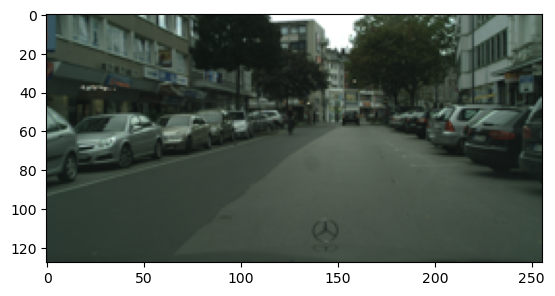

In [29]:
headers = {
        'Content-Type': 'application/json',
        'accept': 'application/json',
    }

# URL to use
url_string = f'https://p8api0simple.herokuapp.com/image_to_study'

# Image to test
#image_path_to_test = r'C:\Users\bejat\Desktop\open_ia\P8\API\aachen_000011_000019_leftImg8bit.png'
image_path_to_test = r'C:\Users\bejat\Desktop\open_ia\P8\API\aachen_000013_000019_leftImg8bit.png'
#image_path_to_test = r'C:\Users\bejat\Desktop\open_ia\P8\API\berlin_000012_000019_leftImg8bit.png'

# Transform for Heroku memory limitation
low_memory_image_from_dataset(image_path_to_test)

image = 'test_image.jpg'

In [30]:
# Create dictionnary
img = open(image, 'rb')
my_img = {'image': img}

# OK HEROKU
r = requests.post(url_string, files=my_img)

In [31]:
r

<Response [200]>

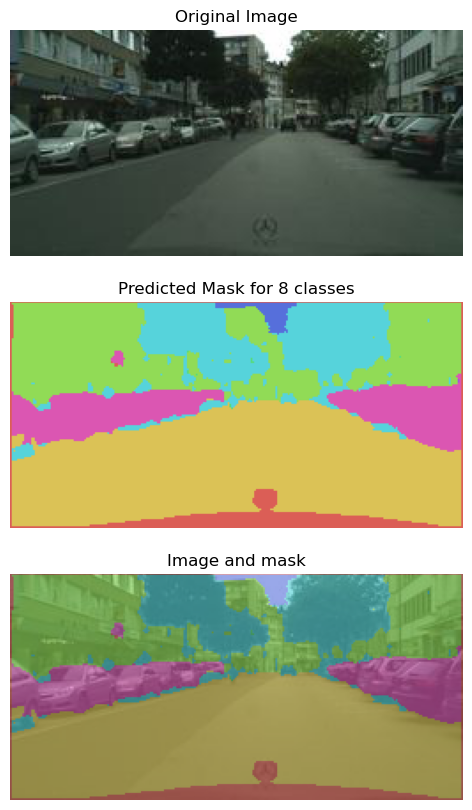

In [32]:
decode_response(image, r)

# ===============================================
# TESTS PREALABLES EN LOCAL
# NE PAS REFAIRE TOURNER
# ===============================================

# ===============================================
# TEST LOCAL API simple
# ===============================================

In [19]:
# URL to use

# OK en local
url_string = f'http://127.0.0.1:5000/image_to_study'
image_path = 'test_img.jpg'
image = open(image_path, 'rb')

my_img = {'image': image}
r = requests.post(url_string, files=my_img)

In [35]:
r

<Response [200]>

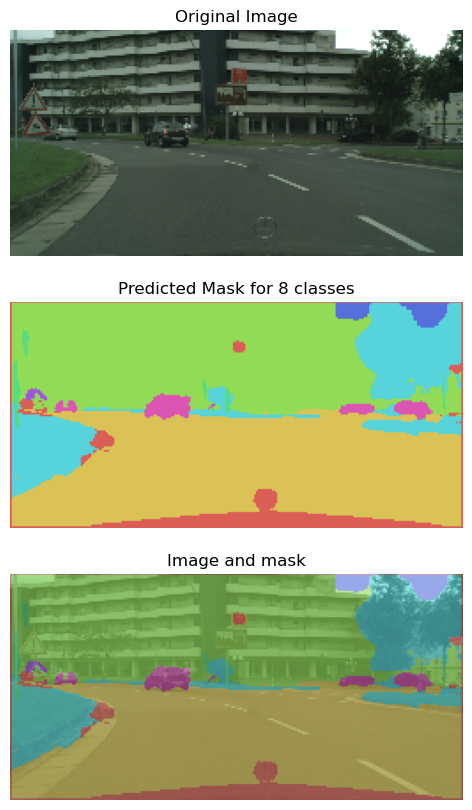

In [37]:
decode_response(image_path, r)

# ===============================================
# TEST LOCAL DOCKER API simple
# ===============================================

In [44]:
# URL to use

# NO OK en local
url_string = f'http://127.0.0.1:8080/image_to_study'
image_path = 'test_img.jpg'
image = open(image_path, 'rb')

my_img = {'image': image}
r = requests.post(url_string, files=my_img)

In [45]:
r

<Response [200]>

In [46]:
data = r.json()
mask_img_string = data['Mask']

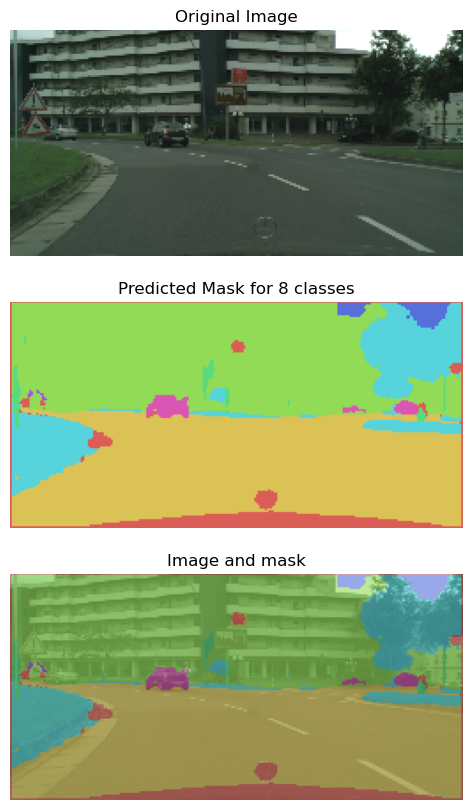

In [47]:
decode_response(image_path, r)